# Protocolo de Teletransporte

In [9]:
import numpy as np
from qiskit import *
import qiskit.quantum_info as qi
from qiskit.visualization import plot_bloch_multivector

In [23]:
qc = QuantumCircuit(3, 2) # são 3 registros quânticos e 2 clássicos

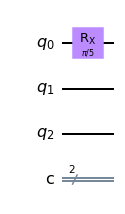

In [24]:
# Criação no qubit 0 do estado a ser teletransportado

qc.rx(np.pi/5, 0) # rotação em torno do eixo X na esfera de Bloch no qubit 0

qc.draw('mpl')

In [25]:
# Execução do circuito inicial

svsim = Aer.get_backend('statevector_simulator') # Defini o simulador para execução do circuito

result = execute(qc, shots = 1, backend = svsim).result() # Resultado da execução do circuito

svector = result.get_statevector()

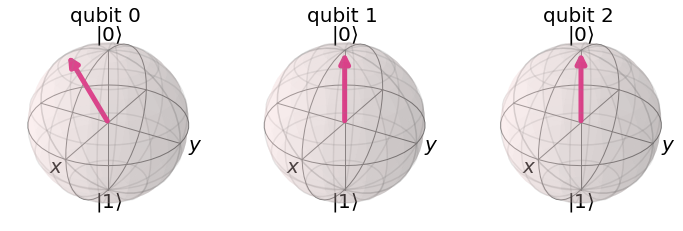

In [26]:
#Visualização do estado inicial na esfera de Bloch

plot_bloch_multivector(svector)

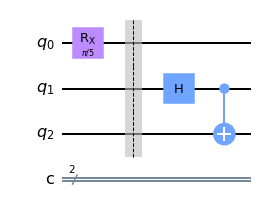

In [27]:
# Emaranhamento do qubit 1 e 2

qc.barrier() # serve apenas para deixar o circuito mais organizado

qc.h(1) 

qc.cnot(1, 2) # Aplica a porta CNOT no qubit 2 condicionado ao qubit 1

qc.draw('mpl')

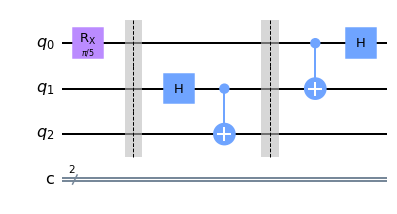

In [28]:
# Aplicação da medida de Bell no qubits 0 e 1

qc.barrier()

qc.cnot(0, 1)

qc.h(0)

qc.draw('mpl')

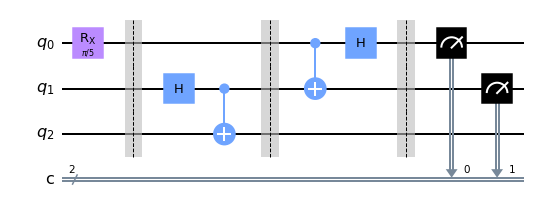

In [29]:
# Medição do qubit 0 e 1

qc.barrier()

qc.measure(0, 0)

qc.measure(1, 1)

qc.draw('mpl')

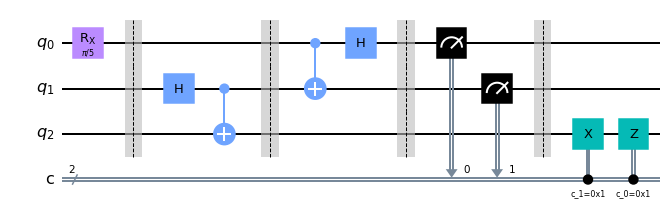

In [30]:
# Correções no qubit 2

qc.barrier()

qc.x(2).c_if(1, 1) # aplica X em 2 se a medida do qubit 1 for 1

qc.z(2).c_if(0, 1) # aplica Z em 2 se a medida do qubit 0 for 1

qc.draw('mpl')

In [31]:
# Execução do circuito com o protocolo de teletransporte

result = execute(qc, shots = 1, backend = svsim).result() 

svector = result.get_statevector()

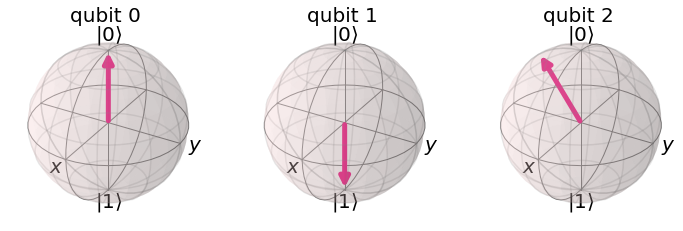

In [32]:
#Visualização do estado inicial na esfera de Bloch

plot_bloch_multivector(svector)